In [1]:
class SGD:
    def __init__(self, lr=0.01): #lrは学習係数
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

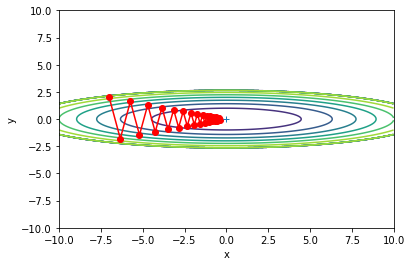

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizer = SGD(lr=0.95)
x_history = []
y_history = []
params['x'], params['y'] = init_pos[0], init_pos[1]
  
for i in range(30):
    x_history.append(params['x'])
    y_history.append(params['y'])
        
    grads['x'], grads['y'] = df(params['x'], params['y'])
    optimizer.update(params, grads)
    

x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)
    
X, Y = np.meshgrid(x, y) 
Z = f(X, Y)
    
# for simple contour line  
mask = Z > 7
Z[mask] = 0
    
# plot 
plt.plot(x_history, y_history, 'o-', color="red")
plt.contour(X, Y, Z)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.plot(0, 0, '+')
plt.xlabel("x")
plt.ylabel("y")

plt.show()

In [3]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

In [4]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [5]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)
        
        for key in params.keys():
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

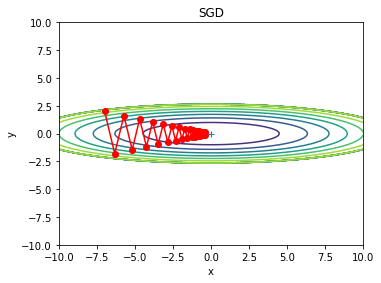

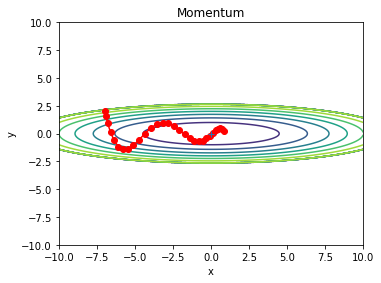

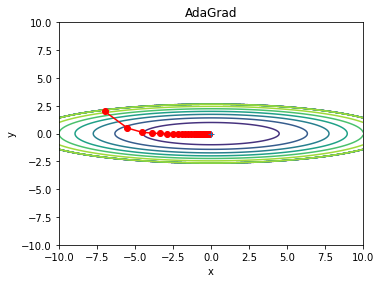

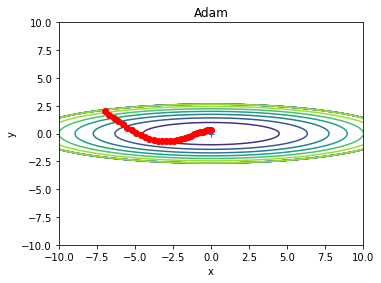

In [6]:
from collections import OrderedDict

optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # for simple contour line  
    mask = Z > 7
    Z[mask] = 0
    
    # plot 
    plt.figure(figsize=(12,9))
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

===========iteration:0===========
SGD:2.35264573768407
Momentum:2.312911328367271
AdaGrad:2.496612678654807
Adam:2.2130777367339514
===========iteration:100===========
SGD:1.4751914666972388
Momentum:0.38728353959291
AdaGrad:0.09265530366625874
Adam:0.19366165316060255
===========iteration:200===========
SGD:0.8696306114518315
Momentum:0.329713060527271
AdaGrad:0.12474205627191083
Adam:0.22948063058420015
===========iteration:300===========
SGD:0.4998233819879294
Momentum:0.11444556484656343
AdaGrad:0.03467900057421124
Adam:0.07506564450335446
===========iteration:400===========
SGD:0.42696358022011927
Momentum:0.09768058239118967
AdaGrad:0.05004131468589881
Adam:0.0798488693935499
===========iteration:500===========
SGD:0.47205970564343114
Momentum:0.24753265546937475
AdaGrad:0.10701470726623824
Adam:0.18694413777159136
===========iteration:600===========
SGD:0.2987579389232301
Momentum:0.12622291303747668
AdaGrad:0.04375124240025618
Adam:0.12394777954050222
===========iteration:700==

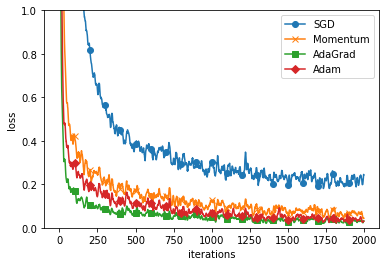

In [7]:
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

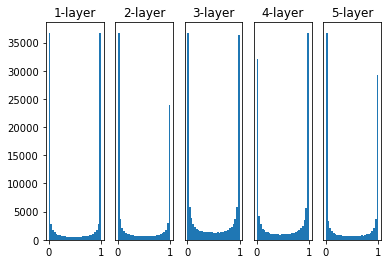

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1

    a = np.dot(x, w)

    z = sigmoid(a)
    
    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():

    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

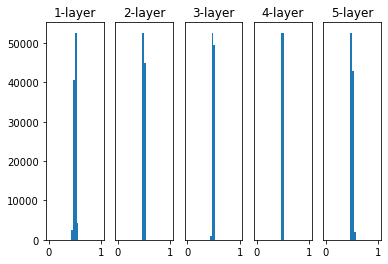

In [9]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01

    a = np.dot(x, w)

    z = sigmoid(a)
    
    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

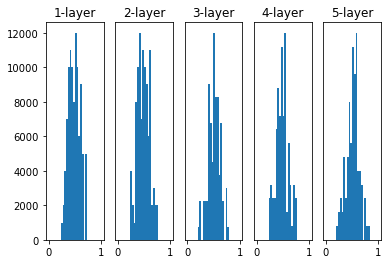

In [10]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)

    a = np.dot(x, w)

    z = sigmoid(a)
    
    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

===========iteration:0===========
std=0.01:2.3025372690880026
Xavier:2.299219597813666
He:2.351407247289165
===========iteration:100===========
std=0.01:2.303071607600935
Xavier:2.2464779653856852
He:1.6772039145694642
===========iteration:200===========
std=0.01:2.3029915677172825
Xavier:2.117729388136146
He:0.9109338365941113
===========iteration:300===========
std=0.01:2.3016610215658138
Xavier:1.6731332228539033
He:0.5228732897468554
===========iteration:400===========
std=0.01:2.2999552354068564
Xavier:1.1984828571896837
He:0.5651943765937959
===========iteration:500===========
std=0.01:2.3006983082606105
Xavier:0.9213021484164379
He:0.49378459064989544
===========iteration:600===========
std=0.01:2.3008984489991544
Xavier:0.7579430338074933
He:0.4278770583386915
===========iteration:700===========
std=0.01:2.303403669265334
Xavier:0.565449359927525
He:0.336217321130303
===========iteration:800===========
std=0.01:2.3038647370094187
Xavier:0.541696209138242
He:0.42245502235408
===

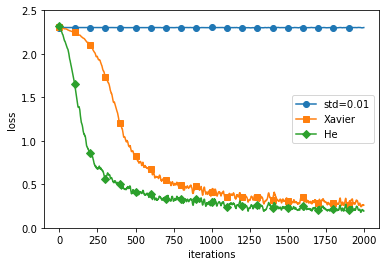

In [11]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

============== 1/16 ==============
epoch:0 | 0.093 - 0.093
epoch:1 | 0.097 - 0.111


C:\Users\apple\Jupyter\common\functions.py:32: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策


epoch:2 | 0.097 - 0.098
epoch:3 | 0.097 - 0.109
epoch:4 | 0.097 - 0.13
epoch:5 | 0.097 - 0.148
epoch:6 | 0.097 - 0.169
epoch:7 | 0.097 - 0.19
epoch:8 | 0.097 - 0.218
epoch:9 | 0.097 - 0.232
epoch:10 | 0.097 - 0.241
epoch:11 | 0.097 - 0.267
epoch:12 | 0.097 - 0.287
epoch:13 | 0.097 - 0.311
epoch:14 | 0.097 - 0.334
epoch:15 | 0.097 - 0.345
epoch:16 | 0.097 - 0.365
epoch:17 | 0.097 - 0.381


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.395
epoch:19 | 0.097 - 0.411
============== 2/16 ==============
epoch:0 | 0.097 - 0.135


C:\Users\apple\Jupyter\common\multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\apple\Jupyter\common\multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\apple\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:1 | 0.097 - 0.113
epoch:2 | 0.097 - 0.123
epoch:3 | 0.097 - 0.168
epoch:4 | 0.097 - 0.184
epoch:5 | 0.097 - 0.212
epoch:6 | 0.097 - 0.226
epoch:7 | 0.097 - 0.263
epoch:8 | 0.097 - 0.289
epoch:9 | 0.097 - 0.325
epoch:10 | 0.097 - 0.347
epoch:11 | 0.097 - 0.369
epoch:12 | 0.097 - 0.385
epoch:13 | 0.097 - 0.418
epoch:14 | 0.097 - 0.438
epoch:15 | 0.097 - 0.47
epoch:16 | 0.097 - 0.492
epoch:17 | 0.097 - 0.502


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.532
epoch:19 | 0.097 - 0.541
============== 3/16 ==============
epoch:0 | 0.106 - 0.084
epoch:1 | 0.326 - 0.114
epoch:2 | 0.482 - 0.122
epoch:3 | 0.57 - 0.186
epoch:4 | 0.652 - 0.218
epoch:5 | 0.714 - 0.27
epoch:6 | 0.746 - 0.308
epoch:7 | 0.797 - 0.355
epoch:8 | 0.836 - 0.382
epoch:9 | 0.865 - 0.42
epoch:10 | 0.887 - 0.451
epoch:11 | 0.902 - 0.475
epoch:12 | 0.917 - 0.507
epoch:13 | 0.928 - 0.532
epoch:14 | 0.945 - 0.549
epoch:15 | 0.95 - 0.57
epoch:16 | 0.959 - 0.587
epoch:17 | 0.969 - 0.599


No handles with labels found to put in legend.


epoch:18 | 0.965 - 0.613
epoch:19 | 0.975 - 0.637
============== 4/16 ==============
epoch:0 | 0.173 - 0.083
epoch:1 | 0.373 - 0.082
epoch:2 | 0.513 - 0.151
epoch:3 | 0.593 - 0.238
epoch:4 | 0.635 - 0.304
epoch:5 | 0.672 - 0.373
epoch:6 | 0.712 - 0.418
epoch:7 | 0.734 - 0.473
epoch:8 | 0.751 - 0.515
epoch:9 | 0.779 - 0.548
epoch:10 | 0.781 - 0.573
epoch:11 | 0.799 - 0.595
epoch:12 | 0.801 - 0.629
epoch:13 | 0.829 - 0.646
epoch:14 | 0.84 - 0.678
epoch:15 | 0.844 - 0.704
epoch:16 | 0.853 - 0.723
epoch:17 | 0.859 - 0.744
epoch:18 | 0.871 - 0.757


No handles with labels found to put in legend.


epoch:19 | 0.874 - 0.763
============== 5/16 ==============
epoch:0 | 0.112 - 0.118
epoch:1 | 0.12 - 0.156
epoch:2 | 0.133 - 0.271
epoch:3 | 0.139 - 0.387
epoch:4 | 0.155 - 0.488
epoch:5 | 0.158 - 0.582
epoch:6 | 0.171 - 0.641
epoch:7 | 0.199 - 0.699
epoch:8 | 0.219 - 0.747
epoch:9 | 0.233 - 0.782
epoch:10 | 0.243 - 0.804
epoch:11 | 0.264 - 0.813
epoch:12 | 0.28 - 0.829
epoch:13 | 0.29 - 0.838
epoch:14 | 0.304 - 0.851
epoch:15 | 0.319 - 0.855
epoch:16 | 0.332 - 0.865
epoch:17 | 0.348 - 0.872


No handles with labels found to put in legend.


epoch:18 | 0.362 - 0.887
epoch:19 | 0.376 - 0.891
============== 6/16 ==============
epoch:0 | 0.094 - 0.087
epoch:1 | 0.118 - 0.182
epoch:2 | 0.141 - 0.38
epoch:3 | 0.12 - 0.538
epoch:4 | 0.118 - 0.641
epoch:5 | 0.117 - 0.714
epoch:6 | 0.117 - 0.747
epoch:7 | 0.117 - 0.788
epoch:8 | 0.153 - 0.812
epoch:9 | 0.131 - 0.836
epoch:10 | 0.141 - 0.85
epoch:11 | 0.155 - 0.865
epoch:12 | 0.123 - 0.886
epoch:13 | 0.122 - 0.901
epoch:14 | 0.123 - 0.907
epoch:15 | 0.154 - 0.915
epoch:16 | 0.121 - 0.93
epoch:17 | 0.136 - 0.937


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.944
epoch:19 | 0.117 - 0.952
============== 7/16 ==============
epoch:0 | 0.117 - 0.099
epoch:1 | 0.117 - 0.167
epoch:2 | 0.117 - 0.528
epoch:3 | 0.117 - 0.703
epoch:4 | 0.117 - 0.768
epoch:5 | 0.117 - 0.812
epoch:6 | 0.117 - 0.843
epoch:7 | 0.117 - 0.879
epoch:8 | 0.117 - 0.898
epoch:9 | 0.117 - 0.919
epoch:10 | 0.117 - 0.933
epoch:11 | 0.117 - 0.946
epoch:12 | 0.117 - 0.957
epoch:13 | 0.117 - 0.964
epoch:14 | 0.117 - 0.972
epoch:15 | 0.117 - 0.981
epoch:16 | 0.117 - 0.984
epoch:17 | 0.117 - 0.984


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.99
epoch:19 | 0.117 - 0.992
============== 8/16 ==============
epoch:0 | 0.117 - 0.098
epoch:1 | 0.116 - 0.475
epoch:2 | 0.117 - 0.671
epoch:3 | 0.117 - 0.767
epoch:4 | 0.117 - 0.82
epoch:5 | 0.116 - 0.869
epoch:6 | 0.116 - 0.917
epoch:7 | 0.116 - 0.938
epoch:8 | 0.116 - 0.96
epoch:9 | 0.116 - 0.978
epoch:10 | 0.116 - 0.983
epoch:11 | 0.116 - 0.986
epoch:12 | 0.116 - 0.995
epoch:13 | 0.116 - 0.997
epoch:14 | 0.116 - 0.997
epoch:15 | 0.116 - 0.999
epoch:16 | 0.116 - 0.999
epoch:17 | 0.116 - 1.0


No handles with labels found to put in legend.


epoch:18 | 0.116 - 1.0
epoch:19 | 0.116 - 1.0
============== 9/16 ==============
epoch:0 | 0.105 - 0.1
epoch:1 | 0.116 - 0.576
epoch:2 | 0.117 - 0.71
epoch:3 | 0.117 - 0.787
epoch:4 | 0.117 - 0.858
epoch:5 | 0.117 - 0.914
epoch:6 | 0.117 - 0.957
epoch:7 | 0.117 - 0.969
epoch:8 | 0.117 - 0.988
epoch:9 | 0.117 - 0.991
epoch:10 | 0.117 - 0.993
epoch:11 | 0.117 - 0.998
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 0.997
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.092 - 0.121
epoch:1 | 0.116 - 0.613
epoch:2 | 0.116 - 0.735
epoch:3 | 0.117 - 0.86
epoch:4 | 0.117 - 0.937
epoch:5 | 0.117 - 0.962
epoch:6 | 0.117 - 0.976
epoch:7 | 0.117 - 0.97
epoch:8 | 0.117 - 0.983
epoch:9 | 0.117 - 0.985
epoch:10 | 0.116 - 0.993
epoch:11 | 0.117 - 0.981
epoch:12 | 0.117 - 0.816
epoch:13 | 0.117 - 0.982
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.993
epoch:16 | 0.117 - 0.996
epoch:17 | 0.117 - 0.996


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 0.999
============== 11/16 ==============
epoch:0 | 0.092 - 0.128
epoch:1 | 0.116 - 0.542
epoch:2 | 0.116 - 0.621
epoch:3 | 0.116 - 0.788
epoch:4 | 0.116 - 0.81
epoch:5 | 0.117 - 0.819
epoch:6 | 0.117 - 0.854
epoch:7 | 0.117 - 0.9
epoch:8 | 0.117 - 0.946
epoch:9 | 0.117 - 0.924
epoch:10 | 0.117 - 0.963
epoch:11 | 0.117 - 0.979
epoch:12 | 0.117 - 0.982
epoch:13 | 0.117 - 0.954
epoch:14 | 0.117 - 0.992
epoch:15 | 0.117 - 0.977
epoch:16 | 0.117 - 0.988
epoch:17 | 0.117 - 0.588


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.982
epoch:19 | 0.117 - 0.99
============== 12/16 ==============
epoch:0 | 0.116 - 0.157
epoch:1 | 0.116 - 0.277
epoch:2 | 0.116 - 0.65
epoch:3 | 0.116 - 0.677
epoch:4 | 0.116 - 0.689
epoch:5 | 0.116 - 0.729
epoch:6 | 0.116 - 0.705
epoch:7 | 0.116 - 0.695
epoch:8 | 0.116 - 0.707
epoch:9 | 0.116 - 0.713
epoch:10 | 0.116 - 0.716
epoch:11 | 0.117 - 0.476
epoch:12 | 0.117 - 0.798
epoch:13 | 0.117 - 0.79
epoch:14 | 0.117 - 0.868
epoch:15 | 0.117 - 0.891
epoch:16 | 0.117 - 0.896
epoch:17 | 0.117 - 0.903


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.903
epoch:19 | 0.117 - 0.903
============== 13/16 ==============
epoch:0 | 0.117 - 0.165
epoch:1 | 0.116 - 0.519
epoch:2 | 0.116 - 0.588
epoch:3 | 0.116 - 0.644
epoch:4 | 0.117 - 0.669
epoch:5 | 0.117 - 0.691
epoch:6 | 0.117 - 0.674
epoch:7 | 0.117 - 0.69
epoch:8 | 0.117 - 0.704
epoch:9 | 0.117 - 0.676
epoch:10 | 0.117 - 0.703
epoch:11 | 0.117 - 0.706
epoch:12 | 0.116 - 0.707
epoch:13 | 0.117 - 0.7
epoch:14 | 0.117 - 0.707
epoch:15 | 0.117 - 0.712
epoch:16 | 0.117 - 0.711
epoch:17 | 0.117 - 0.711
epoch:18 | 0.117 - 0.712


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.758
============== 14/16 ==============
epoch:0 | 0.117 - 0.15
epoch:1 | 0.117 - 0.463
epoch:2 | 0.116 - 0.47
epoch:3 | 0.116 - 0.505
epoch:4 | 0.116 - 0.51
epoch:5 | 0.116 - 0.582
epoch:6 | 0.116 - 0.535
epoch:7 | 0.116 - 0.578
epoch:8 | 0.116 - 0.571
epoch:9 | 0.116 - 0.599
epoch:10 | 0.116 - 0.569
epoch:11 | 0.116 - 0.605
epoch:12 | 0.116 - 0.588
epoch:13 | 0.117 - 0.604
epoch:14 | 0.116 - 0.585
epoch:15 | 0.117 - 0.571
epoch:16 | 0.116 - 0.602
epoch:17 | 0.117 - 0.606
epoch:18 | 0.116 - 0.609


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.609
============== 15/16 ==============
epoch:0 | 0.116 - 0.185
epoch:1 | 0.116 - 0.376
epoch:2 | 0.116 - 0.408
epoch:3 | 0.116 - 0.411
epoch:4 | 0.116 - 0.422
epoch:5 | 0.117 - 0.422
epoch:6 | 0.117 - 0.431
epoch:7 | 0.117 - 0.427
epoch:8 | 0.117 - 0.429
epoch:9 | 0.117 - 0.425
epoch:10 | 0.117 - 0.438
epoch:11 | 0.117 - 0.508
epoch:12 | 0.117 - 0.432
epoch:13 | 0.117 - 0.526
epoch:14 | 0.117 - 0.532
epoch:15 | 0.117 - 0.548
epoch:16 | 0.116 - 0.53
epoch:17 | 0.116 - 0.58


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.599
epoch:19 | 0.116 - 0.61
============== 16/16 ==============
epoch:0 | 0.099 - 0.137
epoch:1 | 0.099 - 0.255
epoch:2 | 0.105 - 0.402
epoch:3 | 0.117 - 0.366
epoch:4 | 0.117 - 0.417
epoch:5 | 0.117 - 0.363
epoch:6 | 0.117 - 0.428
epoch:7 | 0.117 - 0.43
epoch:8 | 0.117 - 0.43
epoch:9 | 0.117 - 0.424
epoch:10 | 0.117 - 0.433
epoch:11 | 0.117 - 0.431
epoch:12 | 0.117 - 0.434
epoch:13 | 0.117 - 0.428
epoch:14 | 0.117 - 0.433
epoch:15 | 0.117 - 0.436
epoch:16 | 0.117 - 0.428
epoch:17 | 0.117 - 0.437
epoch:18 | 0.117 - 0.432
epoch:19 | 0.117 - 0.51


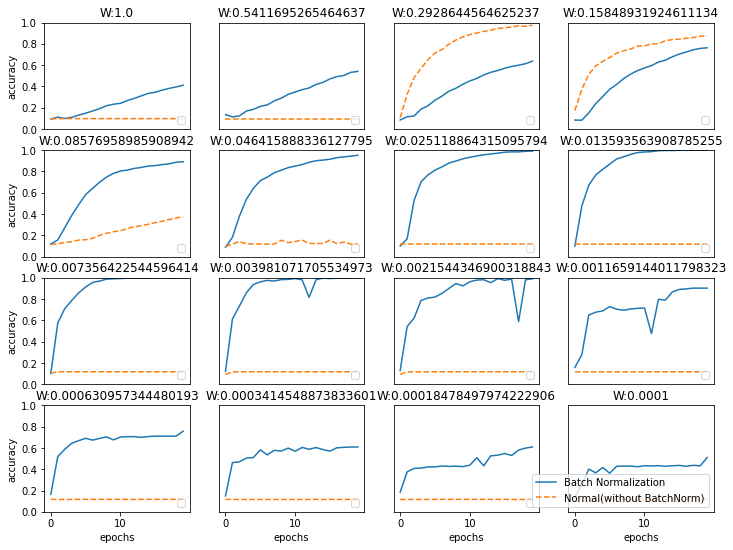

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)
plt.figure(figsize=(12,9))

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

epoch:0, train acc:0.09, test acc:0.0622
epoch:1, train acc:0.09, test acc:0.0713
epoch:2, train acc:0.11666666666666667, test acc:0.0869
epoch:3, train acc:0.17, test acc:0.1103
epoch:4, train acc:0.19333333333333333, test acc:0.1254
epoch:5, train acc:0.23, test acc:0.149
epoch:6, train acc:0.26, test acc:0.1657
epoch:7, train acc:0.2966666666666667, test acc:0.1915
epoch:8, train acc:0.3, test acc:0.2089
epoch:9, train acc:0.33, test acc:0.2298
epoch:10, train acc:0.36333333333333334, test acc:0.2576
epoch:11, train acc:0.37333333333333335, test acc:0.2751
epoch:12, train acc:0.42333333333333334, test acc:0.2905
epoch:13, train acc:0.43333333333333335, test acc:0.2988
epoch:14, train acc:0.45666666666666667, test acc:0.324
epoch:15, train acc:0.47, test acc:0.3314
epoch:16, train acc:0.48, test acc:0.3434
epoch:17, train acc:0.4866666666666667, test acc:0.3532
epoch:18, train acc:0.5033333333333333, test acc:0.3677
epoch:19, train acc:0.5166666666666667, test acc:0.3759
epoch:20, tr

epoch:164, train acc:1.0, test acc:0.7517
epoch:165, train acc:1.0, test acc:0.754
epoch:166, train acc:1.0, test acc:0.7531
epoch:167, train acc:1.0, test acc:0.7542
epoch:168, train acc:1.0, test acc:0.7529
epoch:169, train acc:1.0, test acc:0.753
epoch:170, train acc:1.0, test acc:0.7532
epoch:171, train acc:1.0, test acc:0.7514
epoch:172, train acc:1.0, test acc:0.7547
epoch:173, train acc:1.0, test acc:0.7524
epoch:174, train acc:1.0, test acc:0.7517
epoch:175, train acc:1.0, test acc:0.7488
epoch:176, train acc:1.0, test acc:0.7514
epoch:177, train acc:1.0, test acc:0.7531
epoch:178, train acc:1.0, test acc:0.7498
epoch:179, train acc:1.0, test acc:0.7518
epoch:180, train acc:1.0, test acc:0.751
epoch:181, train acc:1.0, test acc:0.7524
epoch:182, train acc:1.0, test acc:0.753
epoch:183, train acc:1.0, test acc:0.7535
epoch:184, train acc:1.0, test acc:0.7547
epoch:185, train acc:1.0, test acc:0.7538
epoch:186, train acc:1.0, test acc:0.7525
epoch:187, train acc:1.0, test acc:0.7

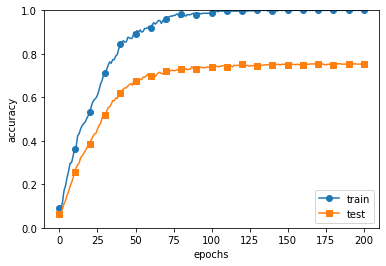

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
weight_decay_lambda = 0 # weight decayを使用しない場合
#weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

epoch:0, train acc:0.13333333333333333, test acc:0.1186
epoch:1, train acc:0.14666666666666667, test acc:0.13
epoch:2, train acc:0.17666666666666667, test acc:0.1443
epoch:3, train acc:0.21, test acc:0.1624
epoch:4, train acc:0.21666666666666667, test acc:0.1764
epoch:5, train acc:0.23, test acc:0.1866
epoch:6, train acc:0.25, test acc:0.2051
epoch:7, train acc:0.26, test acc:0.2148
epoch:8, train acc:0.2966666666666667, test acc:0.2408
epoch:9, train acc:0.30666666666666664, test acc:0.2522
epoch:10, train acc:0.3233333333333333, test acc:0.265
epoch:11, train acc:0.3466666666666667, test acc:0.2746
epoch:12, train acc:0.36666666666666664, test acc:0.2897
epoch:13, train acc:0.35, test acc:0.2898
epoch:14, train acc:0.38, test acc:0.3054
epoch:15, train acc:0.3933333333333333, test acc:0.3154
epoch:16, train acc:0.3933333333333333, test acc:0.3164
epoch:17, train acc:0.4033333333333333, test acc:0.3311
epoch:18, train acc:0.4266666666666667, test acc:0.3506
epoch:19, train acc:0.44, t

epoch:160, train acc:0.9033333333333333, test acc:0.7516
epoch:161, train acc:0.9166666666666666, test acc:0.752
epoch:162, train acc:0.91, test acc:0.7531
epoch:163, train acc:0.9233333333333333, test acc:0.7523
epoch:164, train acc:0.92, test acc:0.7591
epoch:165, train acc:0.9166666666666666, test acc:0.7579
epoch:166, train acc:0.9066666666666666, test acc:0.7542
epoch:167, train acc:0.9166666666666666, test acc:0.7482
epoch:168, train acc:0.91, test acc:0.7514
epoch:169, train acc:0.9166666666666666, test acc:0.7531
epoch:170, train acc:0.9033333333333333, test acc:0.7519
epoch:171, train acc:0.9066666666666666, test acc:0.7438
epoch:172, train acc:0.9133333333333333, test acc:0.7537
epoch:173, train acc:0.9166666666666666, test acc:0.7522
epoch:174, train acc:0.9166666666666666, test acc:0.7556
epoch:175, train acc:0.9266666666666666, test acc:0.7568
epoch:176, train acc:0.9133333333333333, test acc:0.7591
epoch:177, train acc:0.9266666666666666, test acc:0.7559
epoch:178, train 

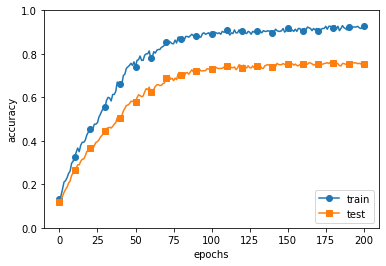

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:2.274884626822116
=== epoch:1, train acc:0.12333333333333334, test acc:0.1209 ===
train loss:2.2737844779285106
train loss:2.277493178544099
train loss:2.3072563825486028
=== epoch:2, train acc:0.14666666666666667, test acc:0.1238 ===
train loss:2.2821783381926926
train loss:2.290730887154872
train loss:2.2954681067863434
=== epoch:3, train acc:0.14, test acc:0.1238 ===
train loss:2.2921365406421255
train loss:2.2802933801336747
train loss:2.2719731715285207
=== epoch:4, train acc:0.14333333333333334, test acc:0.1229 ===
train loss:2.2817148580572946
train loss:2.2936501149332718
train loss:2.2636142447899537
=== epoch:5, train acc:0.13333333333333333, test acc:0.1234 ===
train loss:2.2790875937367754
train loss:2.2941426936751528
train loss:2.262159732599918
=== epoch:6, train acc:0.13333333333333333, test acc:0.1241 ===
train loss:2.278777338609091
train loss:2.2697094312089594
train loss:2.269296652489057
=== epoch:7, train acc:0.14, test acc:0.1255 ===
train loss:2.28945

train loss:2.2152205456496397
train loss:2.198804532801331
train loss:2.1528711982489144
=== epoch:57, train acc:0.27666666666666667, test acc:0.2453 ===
train loss:2.1839011891447395
train loss:2.1732872773918515
train loss:2.2191492974148064
=== epoch:58, train acc:0.28, test acc:0.2471 ===
train loss:2.1854590317986307
train loss:2.1784290378983786
train loss:2.1915928113535768
=== epoch:59, train acc:0.2633333333333333, test acc:0.2433 ===
train loss:2.1672411185213414
train loss:2.1740423364693466
train loss:2.201432005097188
=== epoch:60, train acc:0.27, test acc:0.2463 ===
train loss:2.177094281853586
train loss:2.170638857761877
train loss:2.175242591557804
=== epoch:61, train acc:0.2733333333333333, test acc:0.244 ===
train loss:2.2111296088475423
train loss:2.155354434366004
train loss:2.172932514870677
=== epoch:62, train acc:0.2833333333333333, test acc:0.2458 ===
train loss:2.19218030712011
train loss:2.164781820439528
train loss:2.1639033826293828
=== epoch:63, train acc:

train loss:1.9649855162520966
train loss:1.9550256342222667
train loss:2.043004565663183
=== epoch:113, train acc:0.4033333333333333, test acc:0.3344 ===
train loss:2.0464897739389
train loss:1.9366786939660148
train loss:1.8822292884920921
=== epoch:114, train acc:0.39666666666666667, test acc:0.3359 ===
train loss:1.985615532584598
train loss:2.068787899899703
train loss:1.893330724514196
=== epoch:115, train acc:0.4033333333333333, test acc:0.3404 ===
train loss:1.9789568649094744
train loss:1.975420750758353
train loss:1.9858432191986963
=== epoch:116, train acc:0.4066666666666667, test acc:0.3397 ===
train loss:1.9812720032778344
train loss:1.960821096260737
train loss:1.9228358063068094
=== epoch:117, train acc:0.41, test acc:0.3393 ===
train loss:1.9379960965464156
train loss:1.9269801798245223
train loss:2.007909074005934
=== epoch:118, train acc:0.4066666666666667, test acc:0.3428 ===
train loss:1.9957839750309319
train loss:1.9691592743967126
train loss:1.8907041878838005
===

=== epoch:168, train acc:0.5, test acc:0.4007 ===
train loss:1.7357020909160013
train loss:1.7471739357903382
train loss:1.7338174808544815
=== epoch:169, train acc:0.5033333333333333, test acc:0.4017 ===
train loss:1.7205708486138787
train loss:1.7724032738543505
train loss:1.7400661678044946
=== epoch:170, train acc:0.5, test acc:0.4022 ===
train loss:1.7243318281414741
train loss:1.6769328466239901
train loss:1.711650215104966
=== epoch:171, train acc:0.49333333333333335, test acc:0.4015 ===
train loss:1.8238363443645311
train loss:1.6623176549445415
train loss:1.7202680995339197
=== epoch:172, train acc:0.5033333333333333, test acc:0.4012 ===
train loss:1.7130604540241325
train loss:1.6733874480163737
train loss:1.5991287022306986
=== epoch:173, train acc:0.5066666666666667, test acc:0.405 ===
train loss:1.6337956883852316
train loss:1.7162212835115098
train loss:1.8098372926491186
=== epoch:174, train acc:0.49333333333333335, test acc:0.4058 ===
train loss:1.720224137377823
train 

=== epoch:223, train acc:0.5633333333333334, test acc:0.4478 ===
train loss:1.4441540850940897
train loss:1.2804718347566457
train loss:1.3400157296400386
=== epoch:224, train acc:0.5633333333333334, test acc:0.4498 ===
train loss:1.5869365251097634
train loss:1.3870425527071604
train loss:1.4979326621685831
=== epoch:225, train acc:0.5633333333333334, test acc:0.4482 ===
train loss:1.3195807963765613
train loss:1.420409952653265
train loss:1.459292038724365
=== epoch:226, train acc:0.5666666666666667, test acc:0.4477 ===
train loss:1.4267242439936791
train loss:1.4684723986167223
train loss:1.3635393814821037
=== epoch:227, train acc:0.5633333333333334, test acc:0.4487 ===
train loss:1.4343411372152248
train loss:1.3445896509392787
train loss:1.4119494985370276
=== epoch:228, train acc:0.5666666666666667, test acc:0.4519 ===
train loss:1.446429848064477
train loss:1.357824828704531
train loss:1.3839906091467444
=== epoch:229, train acc:0.57, test acc:0.4534 ===
train loss:1.3106418134

train loss:1.1120681167392805
train loss:1.3017209313873463
train loss:1.3082530083230055
=== epoch:279, train acc:0.6333333333333333, test acc:0.5031 ===
train loss:1.1050294628382316
train loss:1.1794745980679047
train loss:1.1526657528305713
=== epoch:280, train acc:0.6366666666666667, test acc:0.5037 ===
train loss:1.0799576015327563
train loss:1.145492149922468
train loss:1.0245407862905356
=== epoch:281, train acc:0.6333333333333333, test acc:0.5046 ===
train loss:1.1445758334470952
train loss:1.165756120978907
train loss:1.1887729750092768
=== epoch:282, train acc:0.6333333333333333, test acc:0.5055 ===
train loss:1.129829342837451
train loss:1.139302780311267
train loss:1.1491880916545874
=== epoch:283, train acc:0.63, test acc:0.5078 ===
train loss:1.1512617643978296
train loss:1.0797686009128715
train loss:1.2233101746804633
=== epoch:284, train acc:0.6366666666666667, test acc:0.5109 ===
train loss:1.1998359188830634
train loss:1.1435428681889865
train loss:1.160180215902217

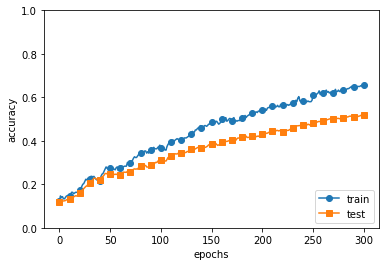

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

val acc:0.15 | lr:5.8468649259630315e-05, weight decay:6.416173026782075e-06
val acc:0.17 | lr:0.001300749270388449, weight decay:1.162186030747791e-05
val acc:0.07 | lr:1.1133918523799753e-05, weight decay:1.1986664033369749e-08
val acc:0.16 | lr:2.3452647661074912e-05, weight decay:1.3179612416858521e-06
val acc:0.1 | lr:1.0887255586063763e-06, weight decay:3.2579726683056048e-06
val acc:0.11 | lr:2.1468855628989e-05, weight decay:1.7893333634137842e-06
val acc:0.07 | lr:4.04663650801537e-06, weight decay:1.2480192641110734e-07
val acc:0.17 | lr:2.072673694823882e-06, weight decay:1.1015132566797194e-06
val acc:0.1 | lr:1.9891286379250788e-05, weight decay:1.2147698840648372e-05
val acc:0.81 | lr:0.005680006715070815, weight decay:1.7716931031131907e-07
val acc:0.74 | lr:0.00604505253040873, weight decay:4.1132146838989206e-08
val acc:0.11 | lr:0.0002524599371354564, weight decay:4.5806958018071637e-07
val acc:0.1 | lr:4.53495566644611e-06, weight decay:8.821272385221036e-07
val acc:

Best-7(val acc:0.54) | lr:0.002569108962870713, weight decay:1.7054248333855555e-07
Best-8(val acc:0.47) | lr:0.0038763585324070025, weight decay:2.8412046180213087e-08
Best-9(val acc:0.45) | lr:0.0027940560858668393, weight decay:3.562125910588794e-05
Best-10(val acc:0.45) | lr:0.002978208222897346, weight decay:1.9327443050566261e-07
Best-11(val acc:0.38) | lr:0.0017802827905458723, weight decay:1.4466053070211746e-08
Best-12(val acc:0.33) | lr:0.002731382666395258, weight decay:1.0548751668647368e-08
Best-13(val acc:0.31) | lr:0.0019463820510390235, weight decay:2.3695116204200057e-07
Best-14(val acc:0.31) | lr:0.0008237316144814886, weight decay:1.1763032229737431e-05
Best-15(val acc:0.3) | lr:0.001632243783258567, weight decay:2.7098687835219304e-07
Best-16(val acc:0.3) | lr:0.0022232180237928456, weight decay:3.6615577057109796e-06
Best-17(val acc:0.26) | lr:0.0034347631943065808, weight decay:1.802417891210381e-06
Best-18(val acc:0.24) | lr:0.0006857738851961504, weight decay:3.

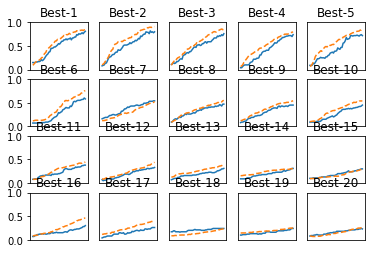

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()